In [6]:
%cd /mnt/hdd1/jkliu/Projects/ATGEmpirical/

/mnt/hdd1/jkliu/Projects/ATGEmpirical


/mnt/hdd1/jkliu/Projects/ATGEmpirical/venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [7]:
from result_plot.common import *
from core.apk_util import parse_manifest_file


def get_apk_tool_result(apk_path: str, real_transitions: dict):
    apk_tool_transitions = {}
    package_name, _, declared_activities, exported_activities = parse_manifest_file(apk_path)
    apk_name, tool_transitions = get_tool_result(apk_path, declared_activities)
    if tool_transitions is None:
        return
    if apk_name not in real_transitions:
        return
    for tool in tools:
        if tool in tool_transitions:
            tool_transition = tool_transitions[tool]
            apk_tool_transitions[tool] = tool_transition
    return apk_tool_transitions


In [8]:
def get_all_results(real_transitions: dict):
    all_transitions = {}
    for tool in tools:
        all_transitions[tool] = set()
    all_transitions['ground truth'] = set()
    all_apks = real_transitions.keys()
    for apk in all_apks:
        real_transition = real_transitions[apk]
        all_transitions['ground truth'].update(real_transition)
        result = get_apk_tool_result(apk, real_transitions)
        if result is not None:
            for tool in tools:
                if tool in result:
                    transitions = result[tool]
                    all_transitions[tool].update(transitions)
    return all_transitions
                    

In [9]:
real_transitions = get_real_transitions()
set_current_version("first_round_no_internet")
all_transitions = get_all_results(real_transitions)

extracting summaries for /mnt/hdd1/jkliu/Projects/ATGEmpirical/apks/fdroid/com.gpl.rpg.AndorsTrail_75.apk
extracting summaries for /mnt/hdd1/jkliu/Projects/ATGEmpirical/apks/fdroid/com.darkempire78.opencalculator_42.apk
extracting summaries for /mnt/hdd1/jkliu/Projects/ATGEmpirical/apks/fdroid/rocks.poopjournal.vacationdays_9.apk
extracting summaries for /mnt/hdd1/jkliu/Projects/ATGEmpirical/apks/fdroid/org.documentfoundation.libreoffice_38.apk
extracting summaries for /mnt/hdd1/jkliu/Projects/ATGEmpirical/apks/fdroid/org.xphnx.ameixamonochrome_4100.apk
extracting summaries for /mnt/hdd1/jkliu/Projects/ATGEmpirical/apks/fdroid/com.github.axet.audiorecorder_377.apk
extracting summaries for /mnt/hdd1/jkliu/Projects/ATGEmpirical/apks/fdroid/de.k3b.android.toGoZip_30.apk
extracting summaries for /mnt/hdd1/jkliu/Projects/ATGEmpirical/apks/fdroid/com.simplemobiletools.calculator_61.apk
extracting summaries for /mnt/hdd1/jkliu/Projects/ATGEmpirical/apks/fdroid/com.jarsilio.android.waveup_121.

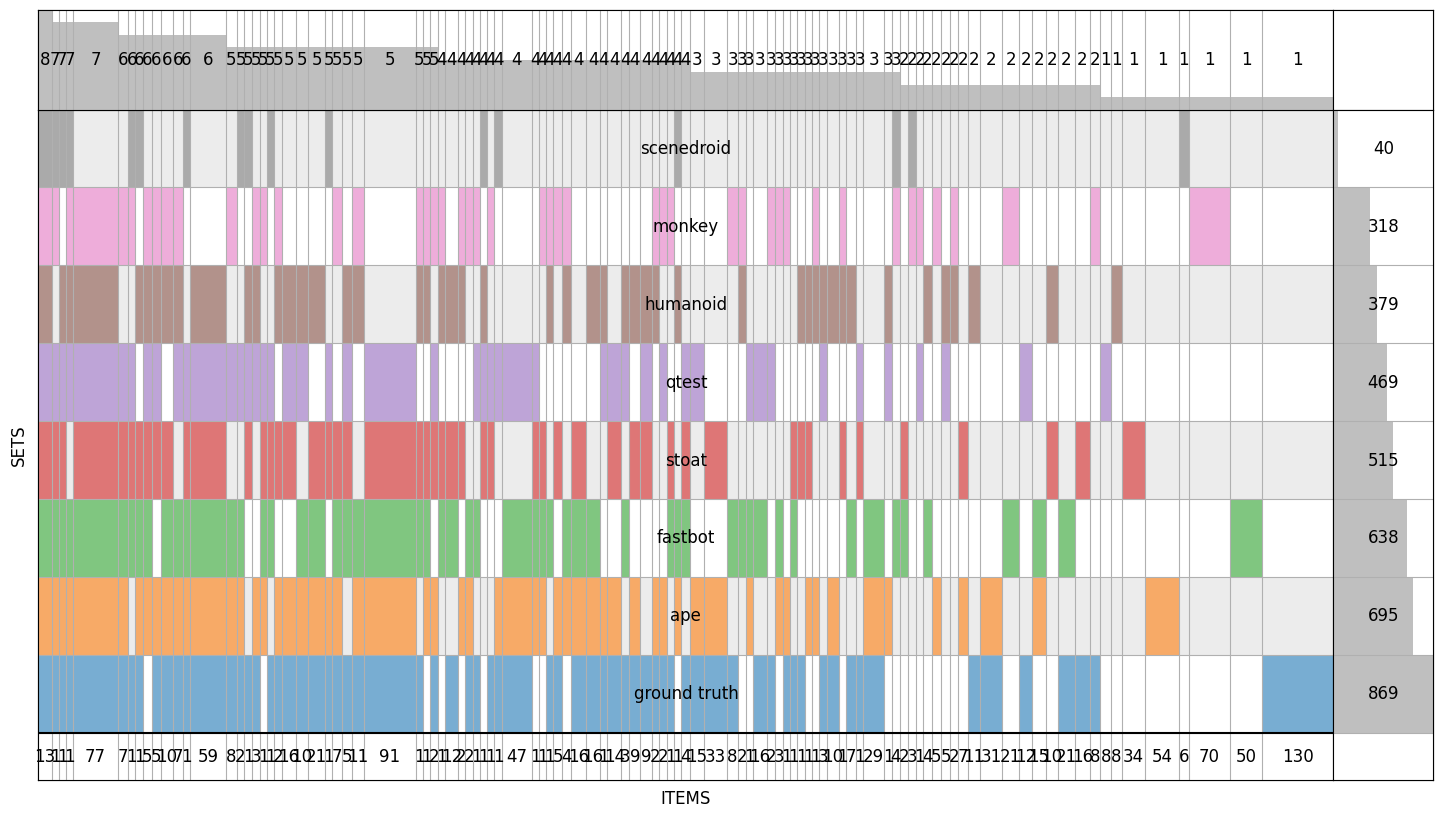

In [10]:
from matplotlib import pyplot as plt
from supervenn import supervenn
# plt.rcParams["font.size"] = 20
plt.figure(figsize=(18, 10))
plt.rcParams.update({'font.size': 10})
plt.rcParams.update({'font.family': 'sans-serif'})

labels = tools + ['ground truth']

sets = [all_transitions[tool] for tool in labels]
supervenn(sets, labels, chunks_ordering='occurrence', widths_minmax_ratio=0.1, sets_ordering="size")
plt.savefig(f"summary/figure/transition_supervenn.pdf", bbox_inches='tight')